This notebook contains a collection of goodness-of-fit tests

In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from tqdm import tqdm
from sklearn.metrics import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
tqdm.pandas()


%matplotlib inline

In [2]:
# Run all models
from src.models import *

balancing...
non-repairs: 15.574291158976727%, repairs: 84.42570884102327%
Fitting 1-layer hierarchical Bayesian models...


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, ppt, sigma_c, mu_c, ppt_sig, ppt_mu]


/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 100 draw iterations (3_000 + 300 draws total) took 353 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, hy

/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 100 draw iterations (3_000 + 300 draws total) took 255 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 10% for some parameters.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3

/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 100 draw iterations (3_000 + 300 draws total) took 750 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, hs

/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 100 draw iterations (3_000 + 300 draws total) took 586 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The number of effective samples is smaller than 10% for some parameters.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, dem, hse, hydr, ppt, sigma_c, mu

/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 100 draw iterations (3_000 + 300 draws total) took 1338 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


Fitting pooled Bayesian models...


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, ppt, sigma_c, mu_c, ppt_sig, ppt_mu]


/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 100 draw iterations (3_000 + 300 draws total) took 94 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, hydr, sigma_c, mu_c, hydr_sig, ppt_mu]


/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 100 draw iterations (3_000 + 300 draws total) took 101 seconds.
The acceptance probability does not match the target. It is 0.94520775394954, but should be close to 0.99. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight proble

/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 100 draw iterations (3_000 + 300 draws total) took 136 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jit

/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 100 draw iterations (3_000 + 300 draws total) took 71 seconds.
The acceptance probability does not match the target. It is 0.9542177615182179, but should be close to 0.99. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


fitting full pooled Bayesian model...


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [c, dem, hse, hydr, ppt, sigma_c, mu_c, dem_beta, hse_sig, hydr_sig, hydr_mu, ppt_sig, ppt_mu]


/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/juannat/opt/anaconda3/envs/septic/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 100 draw iterations (3_000 + 300 draws total) took 197 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


# Goodness-of-Fit Analyses

In general, GoF tests have the following form: $fit - penalty$ (where lower values mean imply better predictive models)

Where the $fit$ typically measures how uncertain the prediction is to variation in parameters: $log(\frac{1}{N}\sum_{i=1}^NP(y|\hat{\theta_i}))$. If for all $\theta_i$, the probability of predicting y is always 1 (certain), then $log(1) = 0$

Where the $penalty$ typically measures the variance of the fitted posterior: $Var_{i=1}^nlog(P(y|\hat{\theta_i}))$

Models summary:
1. _Water model_: __distance to water bodies, annual maxima precipitation__
2. _Soil model_: distance to water bodies, annual maxima precipitation, __soil hydraulic conductivity__
3. _Socio model_: distance to water bodies, annual maxima precipitation, soil hydraulic conductivity, __median housing value__
4. _Topo model_: distance to water bodies, annual maxima precipitation, soil hydraulic conductivity, median housing value, __flow accumulation, elevation__

## 1. Widely Applicable Information Criterion (WAIC)
$fit = \sum_{i=1}^s-2log(\frac{1}{n}\sum_{j=1}^nP(y_i|\hat{\theta_j}))$ (for all points $s$)

$penalty = \sum_{i=1}^sVar_{j=1}^nlog(P(y_i|\hat{\theta_j}))$ (for all points $s$)

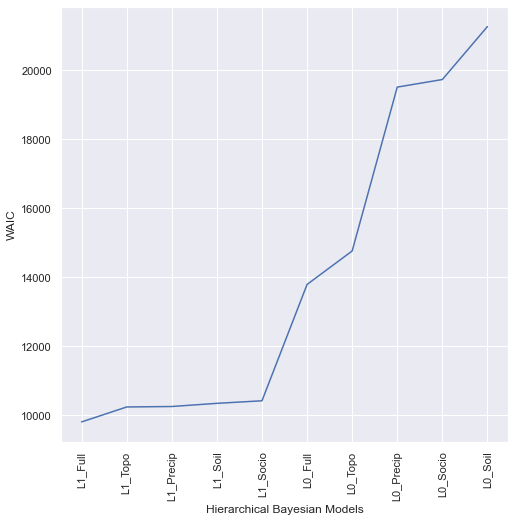

In [13]:
# waic_df = pm.compare(traces_dict, ic='WAIC', scale='deviance')
# waic_df.reset_index(inplace=True)

# Plot WAIC (lower is better)
f, ax = plt.subplots(figsize=(8,8))
waic_df['waic'].plot(ax=ax)
ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(waic_df['index'].values, rotation='vertical')
# ax.set_title('WAIC GoF')
ax.set_xlabel('Hierarchical Bayesian Models')
ax.set_ylabel('WAIC')
f.savefig('../docs/waic_line.pdf', dpi=300)

In [4]:
waic_df

,index,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
0,L1_Full,0,9809.086033,99.458496,0.000000,0.942138,133.409581,0.000000,True,deviance
1,L1_Topo,1,10242.032206,44.995413,432.946173,0.057670,131.360274,44.811905,True,deviance
2,L1_Precip,2,10255.588724,58.503968,446.502691,0.000270,130.798045,42.437711,True,deviance
3,L1_Soil,3,10347.301204,57.344307,538.215171,0.000266,131.009930,47.617371,True,deviance
4,L1_Socio,4,10421.669580,46.575184,612.583547,0.000724,131.059825,55.299862,True,deviance
5,L0_Full,5,13794.162638,4.325846,3985.076605,0.000168,127.391442,111.121197,False,deviance
6,L0_Topo,6,14764.955867,1.995015,4955.869834,0.000143,118.510551,115.403097,False,deviance
7,L0_Precip,7,19515.843067,1.969156,9706.757035,0.000031,95.632762,137.024195,False,deviance
8,L0_Socio,8,19735.394121,2.077067,9926.308088,0.000030,98.853032,143.885335,False,deviance
9,L0_Soil,9,21271.234248,1.776562,11462.148215,0.000000,66.536409,137.175516,False,deviance


Text(0, 0.5, 'WAIC relative error (%)')

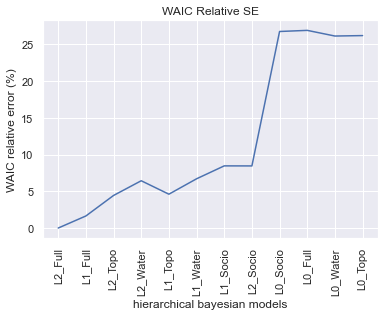

In [4]:
# Plot WAIC relative SE
ax = waic_df['dse'].plot()

ax.set_xticks(range(len(waic_df)))
ax.set_xticklabels(waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC Relative SE')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC relative error (%)')

Text(0, 0.5, 'WAIC')

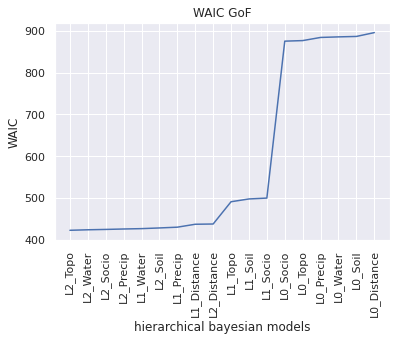

In [ ]:
opt_waic_df = pm.compare(opt_traces_dict, ic='WAIC', scale='deviance')
opt_waic_df.reset_index(inplace=True)

# Plot WAIC (lower is better)
ax = opt_waic_df['waic'].plot.line()
ax.set_xticks(range(len(opt_waic_df)))
ax.set_xticklabels(opt_waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC GoF')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC')

Text(0, 0.5, 'WAIC relative error (%)')

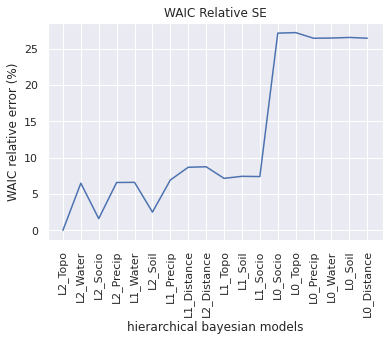

In [ ]:
# Plot WAIC relative SE
ax = opt_waic_df['dse'].plot()

ax.set_xticks(range(len(opt_waic_df)))
ax.set_xticklabels(opt_waic_df['index'].values, rotation='vertical')
ax.set_title('WAIC Relative SE')
ax.set_xlabel('hierarchical bayesian models')
ax.set_ylabel('WAIC relative error (%)')

In [15]:
# Prettier graph: sort in the right order TODO: cleaner function to sort
# l2_sorter = ['L2_Water', 'L2_Topo', 'L2_Socio', 'L2_Full']
# l2 = waic_df[waic_df['index'].str[:2] == 'L2'].set_index('index')
# l2 = l2.loc[l2_sorter]
# l2_waic, l2_dse = l2.waic.values, l2.dse.values

l1_sorter = ['L1_Precip', 'L1_Soil', 'L1_Topo', 'L1_Socio', 'L1_Full']
l1 = waic_df[waic_df['index'].str[:2] == 'L1'].set_index('index')
l1 = l1.loc[l1_sorter]
l1_waic, l1_dse = l1.waic.values, l1.dse.values

l0_sorter = ['L0_Precip', 'L0_Soil', 'L0_Topo', 'L0_Socio', 'L0_Full']
l0 = waic_df[waic_df['index'].str[:2] == 'L0'].set_index('index')
l0 = l0.loc[l0_sorter]
l0_waic, l0_dse = l0.waic.values, l0.dse.values

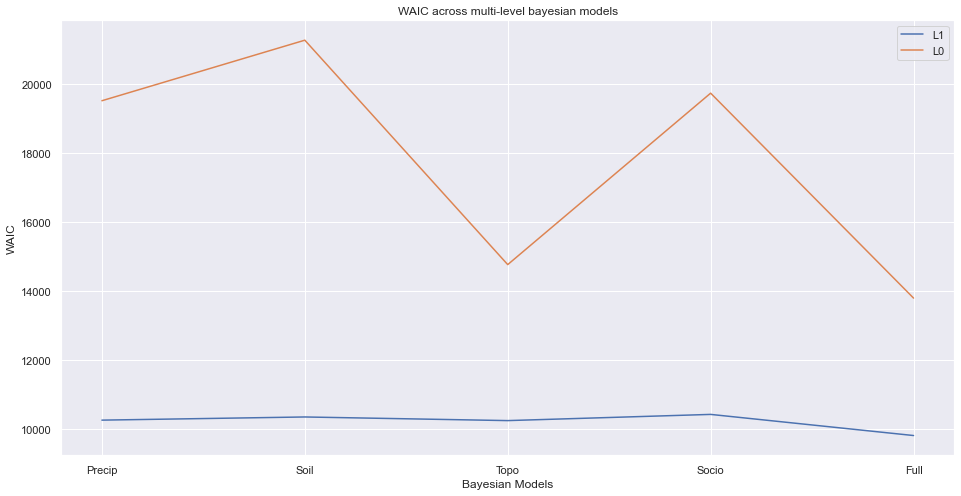

In [16]:
# WAIC
x = ['Precip', 'Soil', 'Topo', 'Socio', 'Full']
f, ax = plt.subplots(figsize=(16,8))
# ax.plot(x, l2_waic, label='L2')
ax.plot(x, l1_waic, label='L1')
ax.plot(x, l0_waic, label='L0')
ax.set_title('WAIC across multi-level bayesian models')
ax.set_xlabel('Bayesian Models')
ax.set_ylabel('WAIC')
ax.legend()

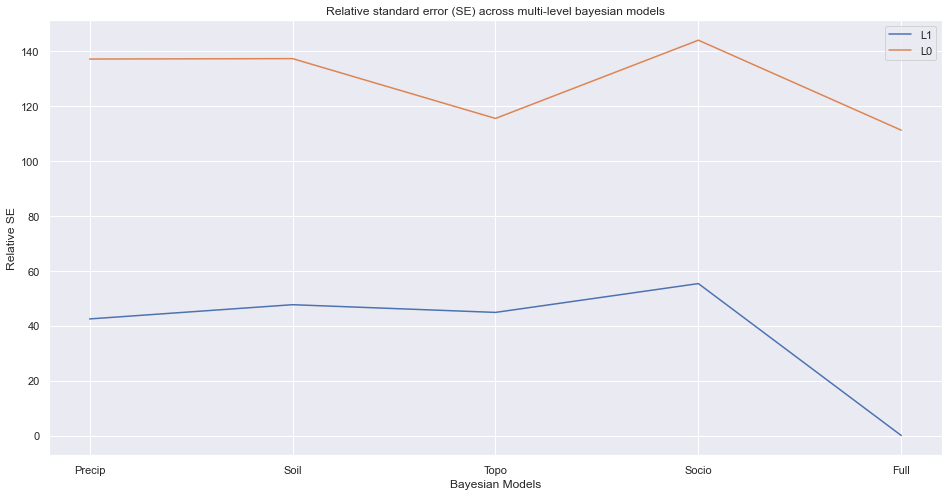

In [18]:
# Uncertainty (dSE)
x = ['Precip', 'Soil', 'Topo', 'Socio', 'Full']
f, ax = plt.subplots(figsize=(16,8))
# ax.plot(x, l2_dse, label='L2')
ax.plot(x, l1_dse, label='L1')
ax.plot(x, l0_dse, label='L0')
ax.set_title('Relative standard error (SE) across multi-level bayesian models')
ax.set_xlabel('Bayesian Models')
ax.set_ylabel('Relative SE')
ax.legend()

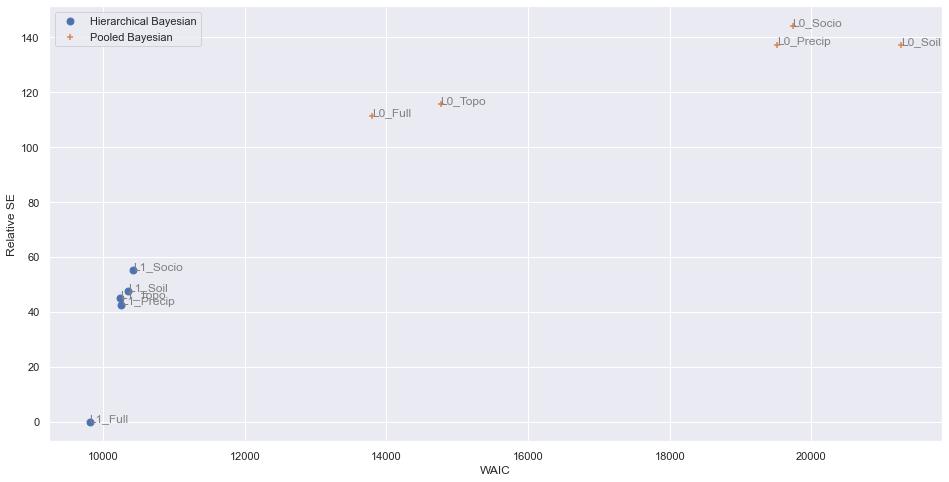

In [33]:
# SE vs WAIC
f, ax = plt.subplots(figsize=(16,8))
# ax.scatter(l2_waic, l2_dse, label='L2', marker='x')
ax.scatter(l1_waic, l1_dse, label='Hierarchical Bayesian', marker='o', s=48)
ax.scatter(l0_waic, l0_dse, label='Pooled Bayesian', marker='+', s=48)
for i, txt in enumerate(l1.index.values):
    ax.annotate(txt, (l1_waic[i] - 0.5, l1_dse[i] + 0.2), fontsize=12, color='gray')

for i, txt in enumerate(l0.index.values):
    ax.annotate(txt, (l0_waic[i] - 0.5, l0_dse[i] + 0.2), fontsize=12, color='gray')

ax.set_xlabel('WAIC')
ax.set_ylabel('Relative SE')
ax.legend()
f.savefig('../docs/waic_se_all.pdf', dpi=300)

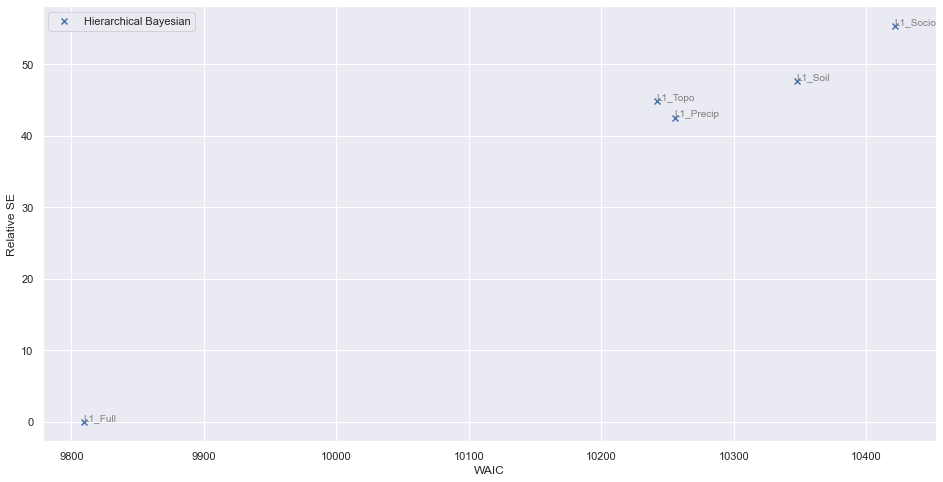

In [34]:
# SE vs WAIC (without l0)
f, ax = plt.subplots(figsize=(16,8))
# ax.scatter(l2_waic, l2_dse, label='L2', marker='o')
ax.scatter(l1_waic, l1_dse, label='Hierarchical Bayesian', marker='x')

# for i, txt in enumerate(l2.index.values):
#     ax.annotate(txt, (l2_waic[i] - 0.5, l2_dse[i] + 0.2), fontsize=10, color='gray')

for i, txt in enumerate(l1.index.values):
    ax.annotate(txt, (l1_waic[i] - 0.5, l1_dse[i] + 0.2), fontsize=10, color='gray')
    

# ax.set_title('Relative SE vs WAIC across multi-level bayesian models')
ax.set_xlabel('WAIC')
ax.set_ylabel('Relative SE')
ax.legend()
f.savefig('../docs/waic_se_l12.pdf', dpi=300)

## 2. Posterior Variance Checks

In [35]:
with full_model:
    ppc = pm.sample_posterior_predictive(
        full_trace, var_names=['ppt', 'hydr', 'hse', 'dem', 'failures']
    )

In [ ]:
# Compute aprior and fitted posterior SD
post_init_var = []
post_fit_var = []
for param, var in var_dict.items():
    post_init_var.append(round(np.sqrt(topo_priors[param].var()), 2))
    post_fit_var.append(round(np.sqrt(ppc[param].var()), 2))

init_var_df = pd.DataFrame({'Params': var_dict.keys(), 'SD': post_init_var, 'Posterior': 'priori'})
fit_sig_df = pd.DataFrame({'Params': var_dict.keys(), 'SD': post_fit_var, 'Posterior': 'fitted'})

sig_df = pd.concat([init_var_df, fit_sig_df])

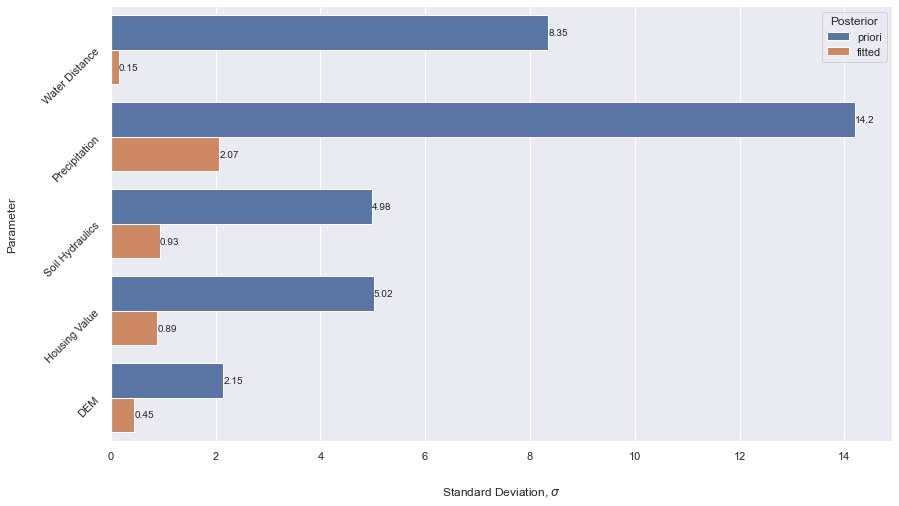

In [47]:
# Plotting
f, ax = plt.subplots(figsize=(14, 8))
ax = sns.barplot(x='SD', y='Params', hue='Posterior', data=sig_df, ci=None, orient='h')
# ax.set_title('SD for Priori and Fitted Posterior', size=16)
ax.set_xlabel('Standard Deviation, $\sigma$', labelpad = 24)
ax.set_ylabel('Parameter', labelpad = 24)
labels = ['Water Distance', 'Precipitation', 'Soil Hydraulics', 'Housing Value', 'DEM']
ax.set_yticklabels(labels)
plt.yticks(rotation = 45)
for i in ax.containers:
    ax.bar_label(i,)
f.savefig('../docs/posterior_var.pdf', dpi=300)